In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # import statsmodels 
from scipy.stats import percentileofscore

The 5 percentile of the simulation is -7.95


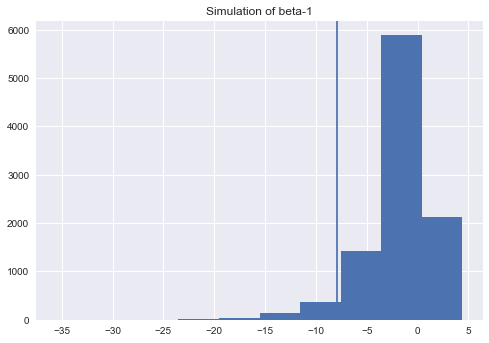

In [10]:

simulation = []
for s in range(10000):
#     np.random.seed(seed=s)
    lisss = (np.random.randn(1,1000))
    numerator = ((lisss.sum())**2/1000-1)*0.5
    denominator = (lisss.cumsum()**2).sum()/(1000**2)
    simulation.append(numerator/denominator)
plt.style.use('seaborn')
plt.hist(simulation)
plt.title('Simulation of beta-1')
plt.axvline(x=np.percentile(simulation, 5))
print('The 5 percentile of the simulation is {}'.format(round(np.percentile(simulation, 5),2)))



97.62 percent of the t-stats are significant


Text(0.5, 1.0, 'Simulation of tvalues when observations = 10000')

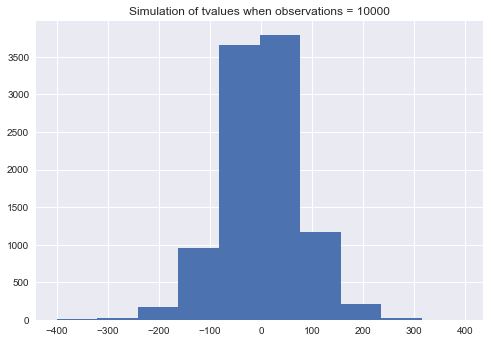

In [44]:
np.random.seed(seed=1)
observation = 10000
y = np.random.randn(10000, observation).cumsum(axis=1)
x = np.random.randn(10000, observation).cumsum(axis=1)
y = np.vstack((np.zeros(len(y)),y.T)).T
x = np.vstack((np.zeros(len(x)),x.T)).T
tvalue = []
for i in range(10000):
    # X = np.stack((np.array([1.0]*1000),np.array(y[0]))).T
    Y = y[i]
    X = sm.add_constant(x[i]) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)
    tvalue.append(model.tvalues[1])
significant = 100 - (percentileofscore(tvalue, 1.96) - percentileofscore(tvalue, -1.96))
print('{} percent of the t-stats are significant'.format(round(significant,2)))
plt.style.use('seaborn')
plt.hist(tvalue)
plt.title('Simulation of tvalues when observations = {}'.format(observation))


In [39]:
100 - (percentileofscore(tvalue, 1.96) - percentileofscore(tvalue, -1.96))

92.48

In [38]:
percentileofscore(tvalue, 1.96)

53.97

In [28]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


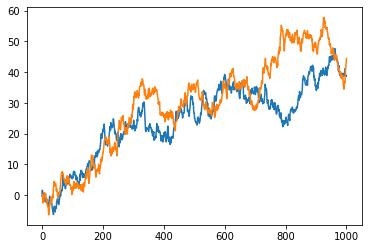

In [21]:
plt.plot(y[0])
plt.plot(x[0])

In [18]:
TEST = np.random.randn(5, 3).cumsum(axis=1)
TEST
np.vstack((np.zeros(len(TEST)),TEST.T)).T

array([[ 0.        , -2.00257349, -2.80636592, -1.96362241],
       [ 0.        ,  0.98318381,  1.48303811, -0.31689596],
       [ 0.        ,  0.17234074, -0.94937021,  0.16473022],
       [ 0.        ,  0.85101226,  1.27310389,  0.47490444],
       [ 0.        , -0.25317095, -1.62214025, -2.8900683 ]])

In [7]:
TEST

array([[ 0.50947369, -1.03634957, -1.3200567 ],
       [-0.77128076, -1.45336312, -1.53968034],
       [ 0.17967948,  0.79943209,  1.85188846],
       [-0.18076135, -0.68290917, -1.14868799],
       [-1.3516777 , -1.33906269, -1.55248755]])

In [6]:
np.ones(len(TEST))

array([1., 1., 1., 1., 1.])